In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set(style='ticks')

from pickle import load

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.interpolate import griddata
from scipy.stats import spearmanr

DATAID calls different datasets generated by ANNs

In [3]:
DATAID = 2

In [4]:
!cat MSTraces/trace_single_1_dimension.{DATAID}.*.csv > trace.{DATAID}.ALL.csv
d = pd.read_csv('trace.%s.ALL.csv' % DATAID, sep=';', header=None, names=['t', 'H', 'expr', 'parvals', 'kk1', 'kk2', 'kk3'])
#d = pd.read_csv('MSTraces/trace_single_1_dimension.0.6.PT1.00.csv', sep=';', header=None, names=['t', 'H', 'expr', 'parvals', 'kk1', 'kk2', 'kk3'])
display(d.tail())

,t,H,expr,parvals,kk1,kk2,kk3
1119891,49995,83.774257,cos(((((pow2((((log((((sqrt(((_a9_ ** _a6_) * ...,"{'d0': {'_a0_': 2.51527064232223, '_a1_': -216...",{'d0': 0.00021859063473386283},-330.594815,249.071664
1119892,49996,83.774257,cos(((((pow2((((log((((sqrt(((_a9_ ** _a6_) * ...,"{'d0': {'_a0_': 2.51527064232223, '_a1_': -216...",{'d0': 0.00021859063473386283},-330.594815,249.071664
1119893,49997,83.774257,cos(((((pow2((((log((((sqrt(((_a9_ ** _a6_) * ...,"{'d0': {'_a0_': 2.51527064232223, '_a1_': -216...",{'d0': 0.00021859063473386283},-330.594815,249.071664
1119894,49998,83.206449,cos(((((pow2((((log((((sqrt(((_a9_ ** _a6_) * ...,"{'d0': {'_a0_': 2.51527064232223, '_a1_': -216...",{'d0': 0.00021859063473386283},-330.594815,248.503856
1119895,49999,83.206449,cos(((((pow2((((log((((sqrt(((_a9_ ** _a6_) * ...,"{'d0': {'_a0_': 2.51527064232223, '_a1_': -216...",{'d0': 0.00021859063473386283},-330.594815,248.503856


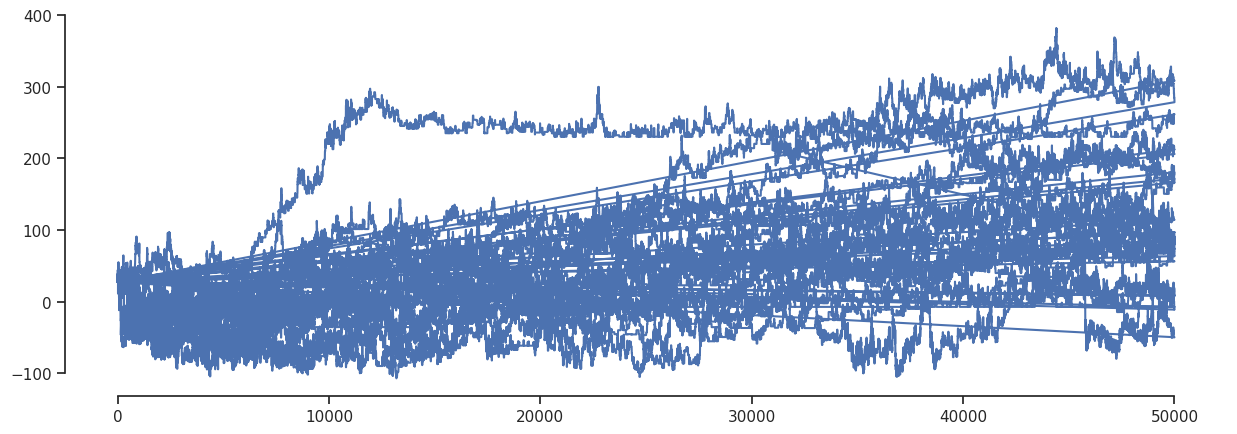

In [5]:
Nini = 00
plt.figure(figsize=(15, 5))
plt.plot(d.t[d.t > Nini], d.H[d.t > Nini])
sns.despine(trim=True)
plt.show()

## Check MDL model 

In [6]:
import sys
import numpy as np
import pandas as pd

sys.path.append('machine-scientist/')
sys.path.append('machine-scientist/Prior/')
from mcmc import *
from parallel import *
from fit_prior import read_prior_par

In [7]:
x, y = {}, {}

VARS = ['x1',]

data = pd.read_csv('Data/sample_1_dimension_ILS2_NL5_LS10.%d.csv' % DATAID) 
x = data[[c for c in VARS]].copy()  
y = data.y 

In [8]:
import ast

#minrow = d[d.H == min(d.H)].iloc[0]
minrow = d[d.H == max(d.H)].iloc[0]
minH, minexpr, minparvals = minrow.H, minrow.expr, ast.literal_eval(minrow.parvals)
print(minH)
print(minexpr)
print(minparvals)
#minparvals

381.65221170783
sin(((tanh(((_a6_ + x1) * _a9_)) * (((-((((_a0_ * _a7_) / _a5_) / ((_a5_ * pow2(_a2_)) / ((_a1_ / (_a2_ / _a1_)) / _a5_)))) / pow2(((_a9_ * ((_a9_ + (log((_a8_ + pow2(((((_a6_ * (_a4_ + _a7_)) * _a4_) + x1) + pow2(_a7_))))) * _a2_)) * pow2(_a9_))) + _a1_))) / _a3_) / (((_a0_ / (_a0_ * ((_a5_ * -((pow2(pow2((_a5_ + _a4_))) * (_a5_ * pow2((cos((_a2_ + _a1_)) + _a5_)))))) * pow2(pow2(_a2_))))) * (cos(((-((x1 + x1)) / _a9_) + (_a7_ ** _a1_))) * ((_a0_ / exp(_a8_)) + (((_a0_ / _a8_) / ((_a8_ + _a5_) * (pow2((_a5_ + _a4_)) * pow2(_a4_)))) / (((_a6_ + _a8_) * (_a4_ * (pow2(pow2(_a8_)) / (cos((pow2(x1) ** _a1_)) * _a1_)))) / ((_a0_ / (_a2_ * _a5_)) / (_a4_ / _a1_))))))) + (((_a6_ + pow2(_a9_)) + -(x1)) * ((_a0_ * _a5_) * (_a4_ * (_a5_ / _a1_))))))) + (_a2_ + _a6_)))
{'d0': {'_a0_': 1.1497178654419496e+150, '_a1_': 0.06744238265907615, '_a2_': 118823.91689447957, '_a3_': -5.305350668771e-43, '_a4_': 36619.95334844361, '_a5_': 116003.80491406479, '_a6_': 0.10893117802013196, '_a7

In [9]:
prior_par = read_prior_par(
    'machine-scientist/Prior/final_prior_param_sq.named_equations.nv1.np10.2017-10-18 18:07:35.089658.dat'
)
    
t = Tree(
    variables=list(x.columns),
    parameters=['a%d' % i for i in range(10)],
    x=x, y=y,
    prior_par=prior_par,
    max_size=200,
    from_string=minexpr,    
)
t.set_par_values(deepcopy(minparvals))

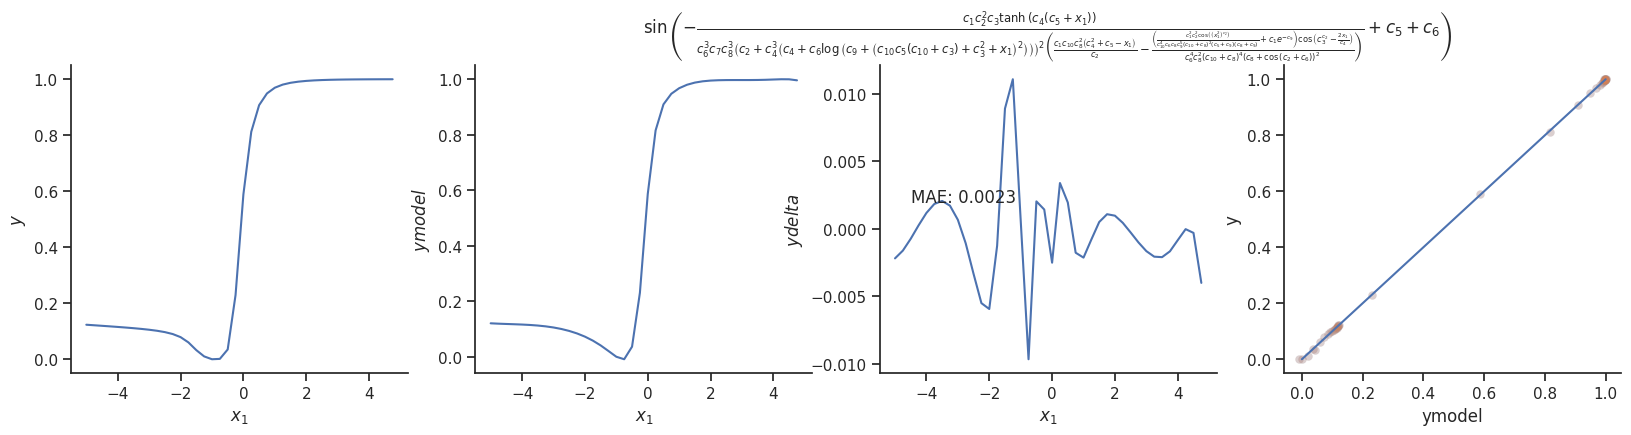

In [10]:
fig = plt.figure(figsize=(20, 4))
spec = gridspec.GridSpec(ncols=4, nrows=1, figure=fig, width_ratios=[5, 5, 5, 5])
f_ax1 = fig.add_subplot(spec[0, 0])
f_ax2 = fig.add_subplot(spec[0, 1])
f_ax3 = fig.add_subplot(spec[0, 2])
f_ax4 = fig.add_subplot(spec[0, 3])

dplot = deepcopy(data)
dplot['ymodel'] = t.predict(x)
dplot['ydelta'] = dplot['ymodel'] - dplot['y']
ymin, ymax = 0, 1

#palette = 'BuPu'
palette = 'Spectral'

f_ax1.plot(dplot.x1, y)

#f_ax1.scatter(dplot.x1, dplot.x2, c=dplot.y, vmin=ymin, vmax=ymax, s=8, cmap=palette)
#sc2 = f_ax2.scatter(dplot.x1, dplot.x2, c=dplot.ymodel, vmin=ymin, vmax=ymax, s=8, cmap=palette)
sc2 = f_ax2.plot(dplot.x1, dplot.ymodel)
sc3 = f_ax3.plot(dplot.x1, dplot.ydelta)
sns.scatterplot(x='ymodel', y='y', data=dplot, ax=f_ax4, linewidth=0, alpha=0.2)
f_ax4.plot((ymin, ymax), (ymin, ymax))

f_ax1.set_xlabel('$x_1$');f_ax1.set_ylabel('$y$')
f_ax2.set_xlabel('$x_1$');f_ax2.set_ylabel('$ymodel$')
f_ax3.set_xlabel('$x_1$');f_ax3.set_ylabel('$ydelta$')
f_ax3.text(-4.5, 0.002, 'MAE: %.4f' % np.mean(np.abs(dplot.y - dplot.ymodel)))
f_ax3.set_title('$%s$' % t.latex())
sns.scatterplot(x='ymodel', y='y', data=dplot, ax=f_ax4, linewidth=0, alpha=0.2)
#plt.savefig('sample.pdf')
plt.savefig('sample_%d.png' %DATAID ,dpi=300)
sns.despine()
plt.show()


# Check best PySR model 

In [27]:
with open('PySR/data_%d.hall_of_fame.pkl' % DATAID, 'rb') as inf:
#with open('PySR/hall_of_fame_2024-04-05_165425.588.pkl', 'rb') as inf:
    pysrmodel = load(inf)
display(pysrmodel)

PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                          0.5234935   
	1        0.360481                   ((0.13374467 * x1) - -0.5402214)   
	2        0.003418  ((-4.132447 - x1) / (-7.893887 - (x1 / -7.8938...   
	3        0.092944  ((-4.132447 - x1) / (-7.893887 + (-0.4497017 /...   
	4        0.012355  ((-4.132447 - x1) / (-7.893887 + (-0.4497017 /...   
	5  >>>>  0.090311  ((-4.132447 - x1) / (-7.893887 + ((x1 / ((-4.1...   
	6        0.063474  ((-4.132447 - x1) / (-7.893887 + ((x1 / (((-4....   
	7        0.038359  ((-4.132447 - x1) / (-7.893887 + ((x1 / ((((-4...   
	
	       loss  complexity  
	0  0.195108           1  
	1  0.046138           5  
	2  0.045511           9  
	3  0.037791          11  
	4  0.036869          13  
	5  0.030776          15  
	6  0.027107          17  
	7  0.025105          19  
]

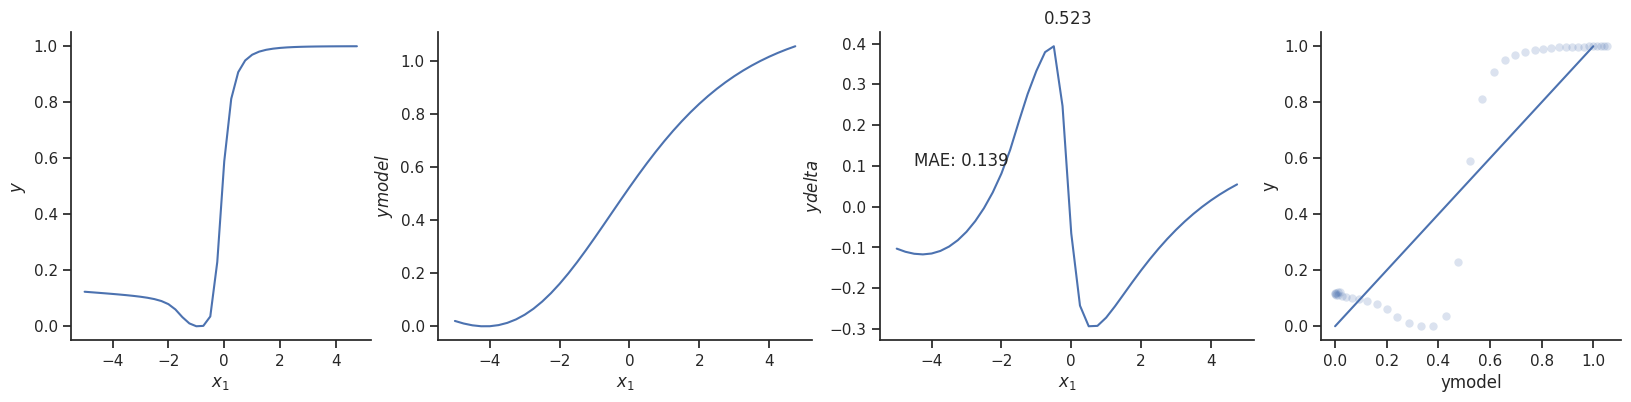

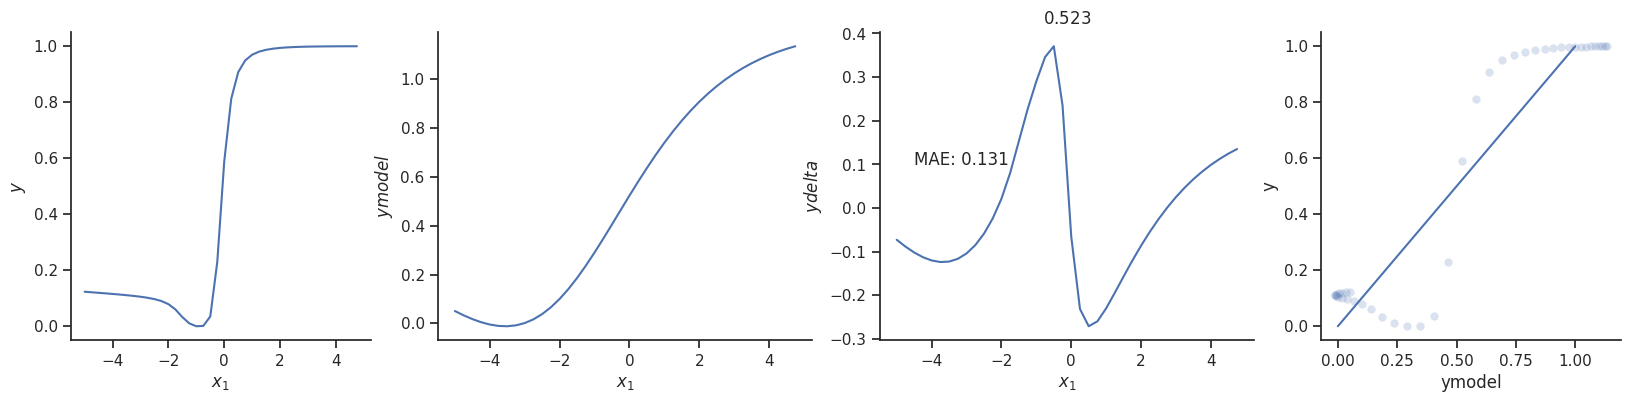

In [28]:
#MODELIND = -1 # None for "best", -1 for most complex model in the Paretto front

for MODELIND in [None, -1]:
    fig = plt.figure(figsize=(20, 4))
    spec = gridspec.GridSpec(ncols=4, nrows=1, figure=fig, width_ratios=[4, 5, 5, 4])
    f_ax1 = fig.add_subplot(spec[0, 0])
    f_ax2 = fig.add_subplot(spec[0, 1])
    f_ax3 = fig.add_subplot(spec[0, 2])
    f_ax4 = fig.add_subplot(spec[0, 3])

    dplot = deepcopy(data)
    dplot['ymodel'] = pysrmodel.predict(x, index=MODELIND)
    dplot['ydelta'] = dplot['ymodel'] - dplot['y']
    ymin, ymax = 0, 1

    #palette = 'BuPu'
    #palette = 'Spectral'

    #f_ax1.scatter(dplot.x1, dplot.x2, c=dplot.y, vmin=ymin, vmax=ymax, s=8, cmap=palette)
    f_ax1.plot(dplot.x1, y)
    #sc2 = f_ax2.scatter(dplot.x1, dplot.x2, c=dplot.ymodel, vmin=ymin, vmax=ymax, s=8, cmap=palette)
    sc2 = f_ax2.plot(dplot.x1, dplot.ymodel)
    #f_ax2.set_title("$%s$" % t.latex())
    #plt.colorbar(sc2, ax=f_ax2)
    f_ax1.set_xlabel('$x_1$')
    f_ax1.set_ylabel('$y$')
    f_ax2.set_xlabel('$x_1$')
    f_ax2.set_ylabel('$ymodel$')

    #sc3 = f_ax3.scatter(dplot.x1, dplot.x2, c=dplot.ydelta, vmin=-ymax, vmax=ymax, s=8, cmap='PuOr')
    sc3 = f_ax3.plot(dplot.x1, dplot.ydelta)
    #plt.colorbar(sc3, ax=f_ax3)
    f_ax3.text(-4.5, 0.1, 'MAE: %.3f' % np.mean(np.abs(dplot.y - dplot.ymodel)))
    f_ax3.set_xlabel('$x_1$')
    f_ax3.set_ylabel('$ydelta$')

    sns.scatterplot(x='ymodel', y='y', data=dplot, ax=f_ax4, linewidth=0, alpha=0.2)
    f_ax4.plot((ymin, ymax), (ymin, ymax))

    f_ax3.set_title('$%s$' % pysrmodel.latex(index=0))

    sns.despine()
    plt.savefig('pysr_%d.png' %DATAID ,dpi=300)
    plt.show()

## All datasets

In [75]:
import sys
import ast
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set(style='ticks')

sys.path.append('machine-scientist/')
sys.path.append('machine-scientist/Prior/')
from mcmc import *
from parallel import *
from fit_prior import read_prior_par

1


51738 -56.1473864526022


2


FileNotFoundError: [Errno 2] No such file or directory: 'trace.2.ALL.csv'

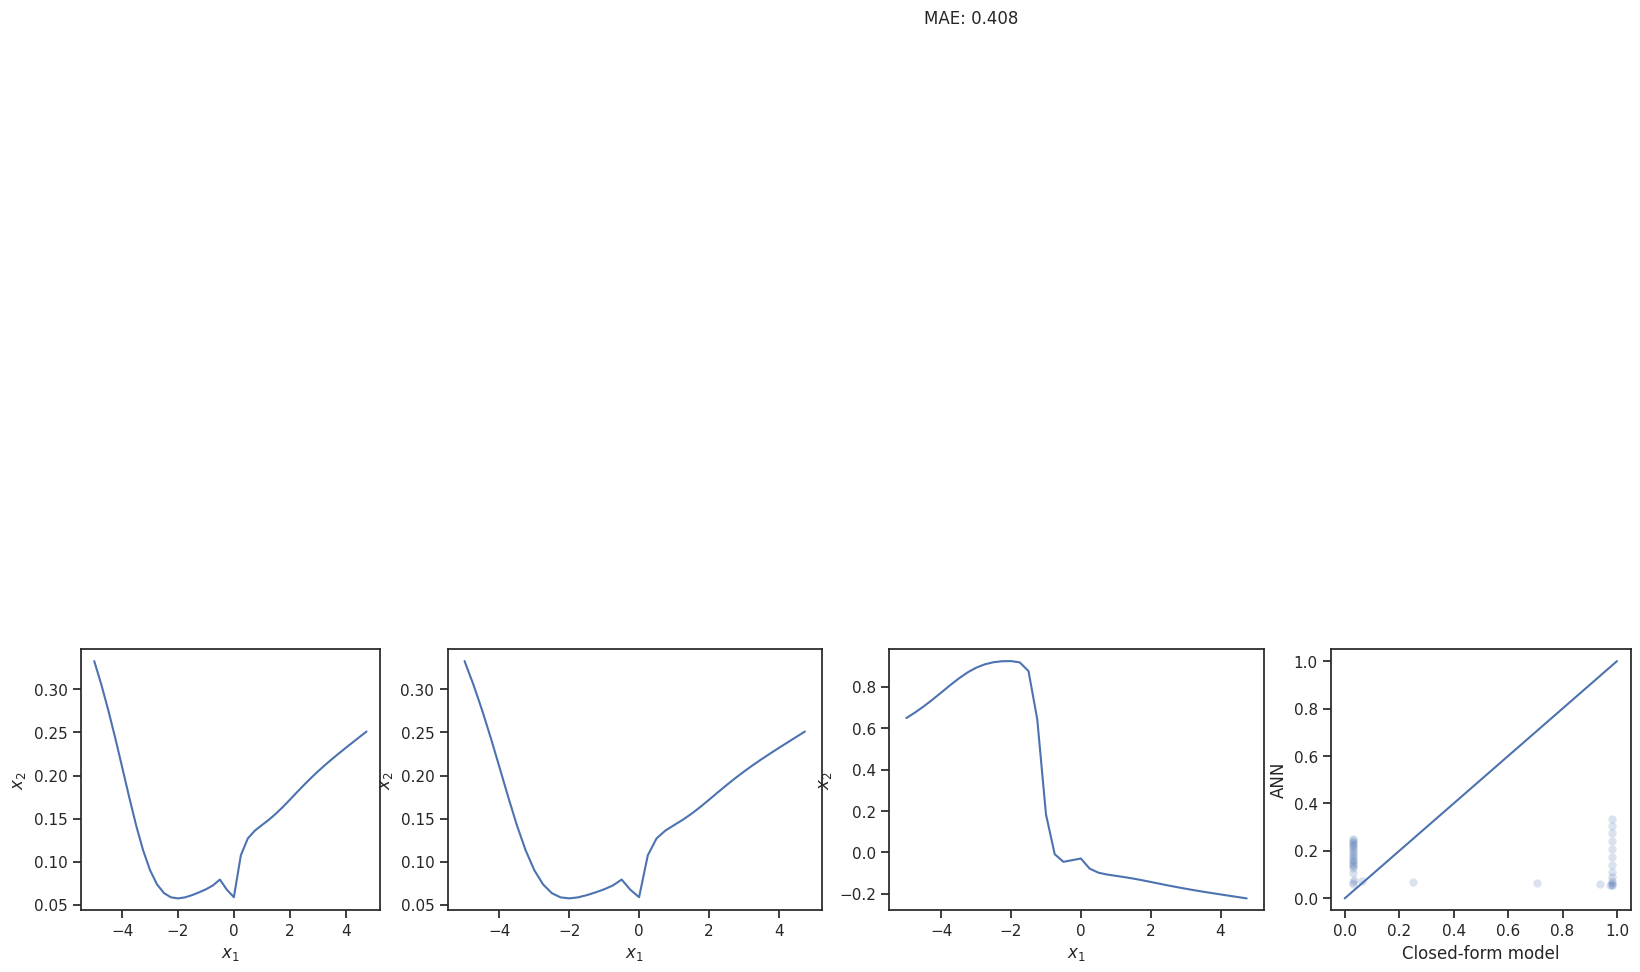

In [28]:
prior_par = read_prior_par('machine-scientist/Prior/final_prior_param_sq.named_equations.nv1.np10.2017-10-18 18:07:35.089658.dat')

DATAIDS = list(range(1, 11))
palette = 'Spectral'
#palette = 'PuRd'
#palette = 'Purples'
#palette = 'BuPu'

fig = plt.figure(figsize=(20, 4*len(DATAIDS)))
spec = gridspec.GridSpec(ncols=4, nrows=len(DATAIDS), figure=fig, width_ratios=[4, 5, 5, 4])

minexprs, minexprops, minexprnops, minexprnpar = [], [], [], []

for ndataid in range(len(DATAIDS)):
    dataid = DATAIDS[ndataid]
    print(dataid, file=sys.stderr)

    #!cat MSTraces/trace_single.{dataid}.*.csv > trace.{dataid}.ALL.csv
    d = pd.read_csv('trace.%s.ALL.csv' % dataid, sep=';', header=None, names=['t', 'H', 'expr', 'parvals', 'kk1', 'kk2', 'kk3'])
    
    #display(d.tail())

    x, y = {}, {}
    VARS = [
        'x1',
        'x2',
    ]
    data = pd.read_csv('Data/sample_ILS2_NL5_LS10.%d.csv' % dataid)
    data_1d=data[data.x2==0]
    #x = data[[c for c in VARS]].copy()
    x = data_1d[[c for c in VARS]].copy()
    y = data_1d.y 

    minrow = d[d.H == min(d.H)].iloc[0]
    minH, minexpr, minparvals = minrow.H, minrow.expr, ast.literal_eval(minrow.parvals)
    print(len(d), minH)
    #minparvals

    t = Tree(
        variables=list(x.columns),
        parameters=['a%d' % i for i in range(10)],
        x=x, y=y,
        prior_par=prior_par,
        max_size=200,
        from_string=minexpr,    
    )
    t.set_par_values(deepcopy(minparvals))

    # For the table
    minexprs.append('$%s$' % t.latex())
    minexprops.append(t.nops)
    minexprnops.append(sum(t.nops.values()))
    minexprnpar.append(t.n_dist_par)

    # Plot
    f_ax1 = fig.add_subplot(spec[ndataid, 0])
    f_ax2 = fig.add_subplot(spec[ndataid, 1])
    f_ax3 = fig.add_subplot(spec[ndataid, 2])
    f_ax4 = fig.add_subplot(spec[ndataid, 3])

    dplot = deepcopy(data_1d)
    dplot['ymodel'] = t.predict(x)
    dplot['ydelta'] = dplot['ymodel'] - dplot['y']
    ymin, ymax = 0, 1

    f_ax1.plot(dplot.x1, dplot.y)
    sc2 = f_ax2.plot(dplot.x1, dplot.y)
    #f_ax2.set_title("$%s$" % t.latex())
    f_ax1.set_xlabel('$x_1$')
    f_ax1.set_ylabel('$x_2$')
    f_ax2.set_xlabel('$x_1$')
    f_ax2.set_ylabel('$x_2$')

    sc3 = f_ax3.plot(dplot.x1, dplot.ydelta)
    f_ax3.text(-4.5, 4, 'MAE: %.3f' % np.mean(np.abs(dplot.y - dplot.ymodel)))
    f_ax3.set_xlabel('$x_1$')
    f_ax3.set_ylabel('$x_2$')

    sns.scatterplot(x='ymodel', y='y', data=dplot, ax=f_ax4, linewidth=0, alpha=0.2)
    f_ax4.plot((ymin, ymax), (ymin, ymax))
    f_ax4.set_xlabel('Closed-form model')
    f_ax4.set_ylabel('ANN')

sns.despine()
plt.savefig('models_ILS2_NL5_LS10.pdf')
plt.show()

minexprtable = pd.DataFrame({
    'Model': DATAIDS,
    'Expression' : minexprs,
    '\\# operations' : minexprnops,
    'Operations' : minexprops,
    '\\# parameters' : minexprnpar,
})

In [32]:
display(minexprtable)

NameError: name 'minexprtable' is not defined

In [ ]:
minexprtable.to_latex()

## Figure 1 cartoon

In [ ]:
DATAID = 5

# Prepare dataframes
x, y = {}, {}
VARS = [
    'x1',
    'x2',
]
data = pd.read_csv('Data/sample_ILS2_NL5_LS10.%d.csv' % DATAID) 
x = data[[c for c in VARS]].copy()  
y = data.y 

# FIGURES
fig = plt.figure(figsize=(5, 4))
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)
f_ax1 = fig.add_subplot(spec[0, 0])

ymin, ymax = 0, 1

#palette = 'BuPu'
palette = 'Spectral'

f_ax1.scatter(data.x1, data.x2, c=data.y, vmin=ymin, vmax=ymax, s=8, cmap=palette)
#f_ax2.set_title("$%s$" % t.latex())
cb = plt.colorbar(sc2, ax=f_ax1)
f_ax1.set_xlabel('$x_1$')
f_ax1.set_ylabel('$x_2$')
cb.ax.set_ylabel('y')

sns.despine()
plt.savefig('ANN_model.svg')
plt.show()

# Noisy data

In [76]:
DATAID, NOISES = 0, "0.1000"

In [77]:
!cat MSTraces/trace_single.{DATAID}.*.s0.1000.csv > trace.{DATAID}.ALL.s0.1000.csv
d = pd.read_csv('trace.%s.ALL.s0.1000.csv' % DATAID, sep=';', header=None, names=['t', 'H', 'expr', 'parvals', 'kk1', 'kk2', 'kk3'])
display(d.tail())

cat: 'MSTraces/trace_single.0.*.s0.1000.csv': No such file or directory


,t,H,expr,parvals,kk1,kk2,kk3


In [ ]:
Nini = 00
plt.figure(figsize=(15, 5))
plt.plot(d.t[d.t > Nini], d.H[d.t > Nini])
sns.despine(trim=True)
plt.show()

In [ ]:
import sys
import numpy as np
import pandas as pd

sys.path.append('machine-scientist/')
sys.path.append('machine-scientist/Prior/')
from mcmc import *
from parallel import *
from fit_prior import read_prior_par

In [ ]:
x, y = {}, {}

VARS = [
    'x1',
    'x2',
]

data = pd.read_csv('Data/sample_ILS2_NL5_LS10.%d.csv' % DATAID) 
x = data[[c for c in VARS]].copy()  
y = data.y 

In [ ]:
import ast

minrow = d[d.H == min(d.H)].iloc[0]
minH, minexpr, minparvals = minrow.H, minrow.expr, ast.literal_eval(minrow.parvals)
print(minH)
print(minexpr)
print(minparvals)
#minparvals

In [ ]:
prior_par = read_prior_par(
    'machine-scientist/Prior/final_prior_param_sq.named_equations.nv2.np10.maxs200.2018-07-20 10:33:53.038930.dat'
)
    
t = Tree(
    variables=list(x.columns),
    parameters=['a%d' % i for i in range(10)],
    x=x, y=y,
    prior_par=prior_par,
    max_size=200,
    from_string=minexpr,    
)
t.set_par_values(deepcopy(minparvals))

In [ ]:
fig = plt.figure(figsize=(25, 4))
spec = gridspec.GridSpec(ncols=5, nrows=1, figure=fig, width_ratios=[4, 4, 5, 5, 4])
f_ax0 = fig.add_subplot(spec[0, 0])
f_ax1 = fig.add_subplot(spec[0, 1])
f_ax2 = fig.add_subplot(spec[0, 2])
f_ax3 = fig.add_subplot(spec[0, 3])
f_ax4 = fig.add_subplot(spec[0, 4])

dplotnoise = pd.read_csv('Data/sample_ILS2_NL5_LS10.%d.noise_s%s.csv' % (DATAID, NOISES))
dplot = deepcopy(data)
dplot['ymodel'] = t.predict(x)
dplot['ydelta'] = dplot['ymodel'] - dplot['y']
ymin, ymax = 0, 1

#palette = 'BuPu'
palette = 'Spectral'

# Observed data
f_ax0.scatter(dplotnoise.x1, dplotnoise.x2, c=dplotnoise.y, vmin=ymin, vmax=ymax, s=8, cmap=palette)
# Noiseless ground truth model
f_ax1.scatter(dplot.x1, dplot.x2, c=dplot.y, vmin=ymin, vmax=ymax, s=8, cmap=palette)
# Fitted model
sc2 = f_ax2.scatter(dplot.x1, dplot.x2, c=dplot.ymodel, vmin=ymin, vmax=ymax, s=8, cmap=palette)
#f_ax2.set_title("$%s$" % t.latex())
plt.colorbar(sc2, ax=f_ax2)
f_ax0.set_xlabel('$x_1$')
f_ax0.set_ylabel('$x_2$')
f_ax1.set_xlabel('$x_1$')
f_ax1.set_ylabel('$x_2$')
f_ax2.set_xlabel('$x_1$')
f_ax2.set_ylabel('$x_2$')
# Deviations from ground truth
sc3 = f_ax3.scatter(dplot.x1, dplot.x2, c=dplot.ydelta, vmin=-ymax, vmax=ymax, s=8, cmap='PuOr')
plt.colorbar(sc3, ax=f_ax3)
f_ax3.text(-4.5, 4, 'MAE: %.3f' % np.mean(np.abs(dplot.y - dplot.ymodel)))
f_ax3.set_xlabel('$x_1$')
f_ax3.set_ylabel('$x_2$')
# True vs predicted
sns.scatterplot(x='ymodel', y='y', data=dplot, ax=f_ax4, linewidth=0, alpha=0.2)
f_ax4.plot((ymin, ymax), (ymin, ymax))
# Title
f_ax2.set_title("$%s$" % t.latex())

sns.despine()